<h1 style='text-align: center;'>CQF Exam One Report - Harrison King</h1>
<h3 style='text-align: center;'>June 2023 Cohort</h3>

In [1]:
# Install dependencies
import numpy as np
import pandas as pd
import scipy.stats as ss
import tabulate
import matplotlib.pyplot as plt

## Optimal Portfolio Allocation

An investment universe of the following risky assets with a dependence structure (correlation) applies to all questions below as relevant:

$$\begin{array}{cccc}\text { Asset } & \boldsymbol{\mu} & \boldsymbol{\sigma} & \boldsymbol{w} \\ A & 0.05 & 0.07 & w_{1} \\ B & 0.07 & 0.28 & w_{2} \\ C & 0.15 & 0.25 & w_{3} \\ D & 0.22 & 0.31 & w_{4}\end{array}$$
$$
\text {Corr}=\left(\begin{array}{cccc}
1 & 0.4 & 0.3 & 0.3 \\
0.4 & 1 & 0.27 & 0.42 \\
0.3 & 0.27 & 1 & 0.5 \\
0.3 & 0.42 & 0.5 & 1
\end{array}\right)
$$

### Question 1: 
Global Minimum Variance portfolio is obtained subject to the budget constraint:

$$
\underset{\boldsymbol{w}}{\operatorname{argmin}} \frac{1}{2} \boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w} \quad \text { s.t. } \boldsymbol{w}^{\prime}\boldsymbol{1} = 1
$$

**1.1)** Derive the analytical solution for optimal allocations $\boldsymbol{w}^{*}$. Provide full mathematical workings.

**1.2)** In the derivation, include the formula derivation for the Lagrangian multiplier.

**1.3)** Compute optimal allocations (Global MV portfolio) for the given investment universe.

**1.1)** First define the diagonal standard deviation matrix, $\boldsymbol{S}$, is defined as follows:

$$
\boldsymbol{S}=\left(\begin{array}{cccc}
{\sigma}_{A} & 0 & 0 & 0 \\
0 & {\sigma}_{B} & 0 & 0 \\
0 & 0 & {\sigma}_{C} & 0 \\
0 & 0 & 0 & {\sigma}_{D}
\end{array}\right) = \left(\begin{array}{cccc}
                    0.07 & 0 & 0 & 0 \\
                    0 & 0.28 & 0 & 0 \\
                    0 & 0 & 0.25 & 0 \\
                    0 & 0 & 0 & 0.31
                    \end{array}\right)
$$

We can calculate the covariance matrix, $\Sigma$ by pre-multiplying and post-multiplying the correlation matrix, $Corr$ by the diagonal standard deviation matrix, $\boldsymbol{S}$:

$$\Sigma = \boldsymbol{S}Corr\boldsymbol{S} = \left(\begin{array}{cccc}
{\sigma}_{A}^2 & {\rho}_{AB}{\sigma}_{A}{\sigma}_{B} & {\rho}_{AC}{\sigma}_{A}{\sigma}_{C} & {\rho}_{AD}{\sigma}_{A}{\sigma}_{D} \\
{\rho}_{BA}{\sigma}_{A}{\sigma}_{B} & {\sigma}_{B}^2 & {\rho}_{BC}{\sigma}_{B}{\sigma}_{C} & {\rho}_{BD}{\sigma}_{B}{\sigma}_{D} \\
{\rho}_{CA}{\sigma}_{A}{\sigma}_{C} & {\rho}_{CB}{\sigma}_{B}{\sigma}_{C} & {\sigma}_{C}^2 & {\rho}_{CD}{\sigma}_{C}{\sigma}_{D} \\
{\rho}_{DA}{\sigma}_{A}{\sigma}_{D} & {\rho}_{DB}{\sigma}_{B}{\sigma}_{D} & {\rho}_{DC}{\sigma}_{C}{\sigma}_{D} & {\sigma}_{D}^2
\end{array}\right)$$

&nbsp;

Then we can define the Lagrangian function $L(x, \lambda)$ with one multiplier $\lambda$ which represents the budget constraint, $\boldsymbol{w}^{\prime}\boldsymbol{1} = 1 == \boldsymbol{w}\boldsymbol{1}^{\prime} = 1$:

$L(x, \lambda) = \frac{1}{2}\boldsymbol{w}^{\prime}{\Sigma}\boldsymbol{w} + \lambda (1-\boldsymbol{1}^{\prime}\boldsymbol{w})$

&nbsp;

Solving the first order equation of the Lagrangian function we get two partial differential equations:

$\frac{\partial L}{\partial w}(w, \lambda) = \boldsymbol{w}^{\prime}{\Sigma} - \lambda\boldsymbol{1}^{\prime} = 0$

$\frac{\partial L}{\partial \lambda}(w, \lambda) = 1 - \boldsymbol{1}^{\prime}\boldsymbol{w} = 0$

&nbsp;

Then we can define the optimal portfolio allocation $\boldsymbol{w}^{\ast}$ by multiplying $\boldsymbol{w}^{\prime}{\Sigma} - \lambda\boldsymbol{1}^{\prime} = 0$ by the inverse matrix ${\Sigma}^{-1}$:

$\boldsymbol{w}^{\prime}{\Sigma} = \lambda\boldsymbol{1}^{\prime}$

$\therefore \boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{1})$ which we can call the candidate function.

&nbsp;

**1.2)** We can then derive the Lagrangian multiplier $\lambda$ by substituting $\boldsymbol{w}^{\ast}$ into the budget constraint $\boldsymbol{w}\boldsymbol{1}^{\prime} = 1$:

$\boldsymbol{1}^{\prime}{\Sigma}^{-1}(\lambda\boldsymbol{1}) = \lambda\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{1} = 1$

$\therefore \lambda = \frac{1}{\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{1}}$

&nbsp;

Finally, we can define the optimal portfolio allocation $\boldsymbol{w}^{\ast}$ by substituting $\lambda$ into the candidate function $\boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{1})$:

$$\text{Optimial Portfolio Allocation } \boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{1}) = {\Sigma}^{-1}(\frac{1}{\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{1}}\boldsymbol{1})$$

**1.3)** Computing allocations: Define the inputs

In [2]:
# Define the assets, standard deviations vector and correlation matrix
assets = ['A', 'B', 'C', 'D']
std_deviation_vector = np.array([0.07, 0.28, 0.25, 0.31])
correlation_matrix = np.array([[1.0, 0.4, 0.3, 0.3], 
                                 [0.4, 1.0, 0.27, 0.42], 
                                 [0.3, 0.27, 1.0, 0.5], 
                                 [0.3, 0.42, 0.5, 1.0]])

# Define a function that calculates the covariance matrix using the correlation matrix and the standard deviations vector
def calculate_Covariance_Matrix(std_deviation_vector: np.ndarray, correlation_matrix: np.ndarray):
    ''' Calculates the covariance matrix from the standard deviation vector and correlation matrix
    Args:
        std_deviation_vector (np.ndarray): Vector of asset standard deviations
        correlation_matrix (np.ndarray): Correlation matrix of assets
    '''
    return np.outer(std_deviation_vector, std_deviation_vector) * correlation_matrix

covariance_matrix = calculate_Covariance_Matrix(std_deviation_vector, correlation_matrix)
print(f'Covariance Matrix:\n{covariance_matrix}')

Covariance Matrix:
[[0.0049   0.00784  0.00525  0.00651 ]
 [0.00784  0.0784   0.0189   0.036456]
 [0.00525  0.0189   0.0625   0.03875 ]
 [0.00651  0.036456 0.03875  0.0961  ]]


In [3]:
# Initiliase the 1s vector
ones_vector = np.ones(len(assets))

# Calculate the inverse of the covariance matrix (Σ^-1)
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
print(f'Inverse covariance matrix:\n{inverse_covariance_matrix}\n')

Inverse covariance matrix:
[[256.33078818 -20.50521083 -12.51725725  -4.53831162]
 [-20.50521083  17.21811596  -0.39445138  -4.98365996]
 [-12.51725725  -0.39445138  22.06964258  -7.90146915]
 [ -4.53831162  -4.98365996  -7.90146915  15.78991307]]



Computing allocations: Calculate the Lagrangian Multiplier lambda
$\lambda = \frac{1}{\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{1}}$

In [4]:
# λ = 1 / 1^'.(Σ^-1).1^
lagrangian_lambda = 1 / ones_vector.T.dot(inverse_covariance_matrix).dot(ones_vector)
print(f'λ = {lagrangian_lambda}')

λ = 0.004768086485896823


Computing allocations: Optimal portfolio allocations
$\boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{1})$

In [5]:
# Optimal weights, w* = (Σ^-1).(λ.1^)
optimal_weights = inverse_covariance_matrix.dot(lagrangian_lambda * ones_vector)

# Format the weights and print
formatted_weights = [f'{weight:.2%}' for weight in optimal_weights]
portfolio = dict(zip(assets, formatted_weights))

print(tabulate.tabulate(portfolio.items(), headers=['Asset', 'Weight'], tablefmt='fancy_grid')) 

╒═════════╤══════════╕
│ Asset   │ Weight   │
╞═════════╪══════════╡
│ A       │ 104.31%  │
├─────────┼──────────┤
│ B       │ -4.13%   │
├─────────┼──────────┤
│ C       │ 0.60%    │
├─────────┼──────────┤
│ D       │ -0.78%   │
╘═════════╧══════════╛


### Question 2:

Consider the optimization for a target return $m$. There is no risk-free asset.

$$
\begin{aligned}
& \underset{\boldsymbol{w}}{\operatorname{argmin}} \frac{1}{2} \boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w} \\
& \boldsymbol{w}^{\prime} \mathbf{1}=1 \\
& \boldsymbol{w}^{\prime} \boldsymbol{\mu}=m
\end{aligned}
$$

**2.1)** Compute $\mathbf{w}^{*}$ and portfolio risk $\sigma_{\Pi}=\sqrt{\boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w}}$ for $m=7 \%$ for three levels of correlation.

**2.2)** Correlation matrix $\times 1, \times 1.3, \times 1.8$, subject to individual correlation upper limit of 0.99 , if the scaling results in correlation value above 1 . Provide all results in a single table.

The vector of returns, $\boldsymbol{\mu}$ is defined as:

$$
\boldsymbol{\mu}=\left(\begin{array}{c}
{\mu}_{A} \\
{\mu}_{B} \\
{\mu}_{C} \\
{\mu}_{D}
\end{array}\right) = \left(\begin{array}{c}
                    0.05 \\
                    0.07 \\
                    0.15 \\
                    0.22
                    \end{array}\right)
$$

In [6]:
# Define the min return, m = 7% and vector of mean returns of the assets, μ
min_return = 0.07
mean_returns_vector = np.array([0.05, 0.07, 0.15, 0.22])

**2.1)** We'll define $\mathbf{w}^{*}$ by solving a new Lagrangian function, $L(x, \lambda, \gamma)$ with two Lagrangian multipliers $\lambda$ and $\gamma$ which represent the budget constraint, $\boldsymbol{w}^{\prime}\boldsymbol{1} = 1 == \boldsymbol{w}\boldsymbol{1}^{\prime} = 1$ and the return constraint, $\boldsymbol{w}^{\prime}\boldsymbol{\mu} = m == \boldsymbol{w}\boldsymbol{\mu}^{\prime} = m$:

Then we can define the Lagrangian function $L(x, \lambda, \gamma)$ as:

$L(x, \lambda, \gamma) = \frac{1}{2}\boldsymbol{w}^{\prime}{\Sigma}\boldsymbol{w} + \lambda(m - \boldsymbol{\mu}^{\prime}\boldsymbol{w}) + \gamma (1-\boldsymbol{1}^{\prime}\boldsymbol{w})$

&nbsp;

Solving the first order equation of the Lagrangian function we get three partial differential equations:

$\frac{\partial L}{\partial w}(w, \lambda, \gamma) = \boldsymbol{w}^{\prime}{\Sigma} - \lambda\boldsymbol{\mu}^{\prime} - \gamma\boldsymbol{1}^{\prime} = 0$

$\frac{\partial L}{\partial \lambda}(w, \lambda, \gamma) = m - \boldsymbol{\mu}^{\prime}\boldsymbol{w} = 0$

$\frac{\partial L}{\partial \gamma}(w, \lambda, \gamma) = 1 - \boldsymbol{1}^{\prime}\boldsymbol{w} = 0$

&nbsp;

Then we can define the optimal portfolio allocation $\boldsymbol{w}^{\ast}$ by multiplying $\boldsymbol{w}^{\prime}{\Sigma} - \lambda\boldsymbol{\mu}^{\prime} - \gamma\boldsymbol{1}^{\prime} = 0$ by the inverse matrix ${\Sigma}^{-1}$:

$\boldsymbol{w}^{\prime}{\Sigma} = \lambda\boldsymbol{\mu}^{\prime} + \gamma\boldsymbol{1}^{\prime}$

$\therefore \boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{\mu} + \gamma\boldsymbol{1})$ which we can call the candidate function.

&nbsp;

Substituting the candidate function, $\boldsymbol{w}^{\ast}$ into our two constraint equations we will try to solve for $\lambda$ and $\gamma$.

First we will substitute $\boldsymbol{w}^{\ast}$ into the budget constraint equation $\boldsymbol{w}\boldsymbol{1}^{\prime} = 1$:

$$\boldsymbol{w}^{\ast}\boldsymbol{1}^{\prime} = 1$$

$$\Rightarrow \boldsymbol{1}^{\prime}{\Sigma}^{-1}(\lambda\boldsymbol{\mu} + \gamma\boldsymbol{1}) = 1$$

$$[1] \;\;\;\; \Rightarrow \lambda\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{\mu} + \gamma\boldsymbol{1}^{\prime}{\Sigma}^{-1}\boldsymbol{1} = 1$$

Then we will substitute $\boldsymbol{w}^{\ast}$ into the return constraint equation $\boldsymbol{w}\boldsymbol{\mu}^{\prime} = m$:

$$\boldsymbol{w}^{\ast}\boldsymbol{\mu}^{\prime} = m$$ 

$$\Rightarrow \boldsymbol{\mu}^{\prime}{\Sigma}^{-1}(\lambda\boldsymbol{\mu} + \gamma\boldsymbol{1}) = m$$

$$[2] \;\;\;\; \Rightarrow \lambda\boldsymbol{\mu}^{\prime}{\Sigma}^{-1}\boldsymbol{\mu} + \gamma\boldsymbol{\mu}^{\prime}{\Sigma}^{-1}\boldsymbol{1} = m$$

&nbsp;

For ease of computation we will define the following scalar variables:

$$A = \boldsymbol{1}{\Sigma}^{-1}\boldsymbol{1}$$ 

$$B = \boldsymbol{\mu}^{\prime}{\Sigma}^{-1}\boldsymbol{1} \Rightarrow \boldsymbol{1}{\Sigma}^{-1}\boldsymbol{\mu}$$

$$C = \boldsymbol{\mu}^{\prime}{\Sigma}^{-1}\boldsymbol{\mu}$$

&nbsp;

We can then re-write equations $[1]$ and $[2]$ as:

$$[1] \;\;\;\; B\lambda + A\gamma = 1$$

$$[2] \;\;\;\; C\lambda + B\gamma = m$$

Rearranging $[1]$ and $[2]$ we define our Lagrangian multipliers, $\lambda$ and $\gamma$, in terms of the constants $A$, $B$, and $C$:

$$\lambda = \frac{Am - B}{AC -{B}^{2}}$$

$$\gamma = \frac{C - Bm}{AC -{B}^{2}}$$

$$\text{Optimial Portfolio Allocation } \boldsymbol{w}^{\ast} = {\Sigma}^{-1}(\lambda\boldsymbol{\mu} + \gamma\boldsymbol{1})$$

**2.2)** Define the scaled correlation matrices as $Corr_{1}$, $Corr_{1.3}$ and $Corr_{1.8}$ respectively. 
$$
\text Corr_{1}=\left(\begin{array}{cccc}
1 & 0.4 & 0.3 & 0.3 \\
0.4 & 1 & 0.27 & 0.42 \\
0.3 & 0.27 & 1 & 0.5 \\
0.3 & 0.42 & 0.5 & 1
\end{array}\right)
$$

$$
\text Corr_{1.3}=\left(\begin{array}{cccc}
1 & 0.52 & 0.39 & 0.39 \\
0.52 & 1 & 0.35 & 0.55 \\
0.39 & 0.35 & 1 & 0.65 \\
0.39 & 0.55 & 0.65 & 1
\end{array}\right)
$$

$$
\text Corr_{1.8}=\left(\begin{array}{cccc}
1 & 0.72 & 0.54 & 0.54 \\
0.72 & 1 & 0.49 & 0.76 \\
0.54 & 0.49 & 1 & 0.9 \\
0.54 & 0.76 & 0.9 & 1
\end{array}\right)
$$

Consequently, the covariance matrices $\Sigma_{1}$, $\Sigma_{1.3}$ and $\Sigma_{1.8}$ are given by:

$$\Sigma_{1} = \boldsymbol{S}Corr_{1}\boldsymbol{S}$$

$$\Sigma_{1.3} = \boldsymbol{S}Corr_{1.3}\boldsymbol{S}$$

$$\Sigma_{1.8} = \boldsymbol{S}Corr_{1.8}\boldsymbol{S}$$

where $\boldsymbol{S}$ is the diagonal matrix of standard deviations of the assets.

Now we can compute the optimal allocation, $\boldsymbol{w}^{\ast}$ and portfolio risk, ${\sigma}_{\Pi}$ for $m = 7\%$ for each of the three correlation matrices.

In [7]:
# Define a function that uses Lagrange multipliers to find the minimum variance portfolio for a given return
def calculate_Optimal_Lagrangian_Allocations(min_return: float, covariance_matrix: np.ndarray, returns_vector: np.ndarray):
    ''' Calculate the Optimal Portfolio allocations using Lagrangian Multipliers closed form solution
    Args:
        min_return (float) = The minimum or 'target' return required for the portfolio, as a decimal (e.g. 0.1 = 10%)
        covariance_matrix (np.array) = The covariance matrix of the portfolio
        returns_vector (np.array) = The mean returns vector of the portfolio
    Returns:
        optimal_weights (np.array) = The optimal weights for the portfolio
    '''
    # Initiliase the 1s vector
    ones_vector = np.ones(returns_vector.shape[0])

    # Calculate the inverse of the covariance matrix (Σ^-1)
    inverse_covariance = np.linalg.inv(covariance_matrix)

    # Get scalar values to solve the quadratic equation for the two constaint equations -> 1. Sum of weights = 1 and 2. Minimum return
    # A = 1^.(Σ^-1).1^
    A = ones_vector.dot(inverse_covariance.dot(ones_vector))

    # B = 1^.(Σ^-1).μ
    B = ones_vector.dot(inverse_covariance.dot(returns_vector))

    # C = μ'.(Σ^-1).μ
    C = returns_vector.T.dot(inverse_covariance.dot(returns_vector))

    # λ = (A*min_return - B) / (A*C - B^2)
    lagrangian_lambda = (A*min_return - B) / (A*C - B**2)

    # γ = (C - B*min_return) / (A*C - B^2)
    lagrangian_gamma = (C - B*min_return) / (A*C - B**2)

    # Calculate the optimal weights, w* for the portfolio
    # w* = (Σ^-1).(λ.μ + γ.1^)
    optimal_weights = inverse_covariance.dot(lagrangian_lambda * returns_vector + lagrangian_gamma * ones_vector)

    return optimal_weights

In [8]:
# Create the scaled correlation matrices
corr_1 = correlation_matrix
corr_1_3 = correlation_matrix * 1.3
corr_1_8 = correlation_matrix * 1.8

# If any correlation is greater than 1, set it to 0.99
corr_1_3[corr_1_3 > 1.0] = 0.99
corr_1_8[corr_1_8 > 1.0] = 0.99

# Set the leading diagonals back to 1.0
np.fill_diagonal(corr_1_3, 1.0)
np.fill_diagonal(corr_1_8, 1.0)

print(f'Correlation Matrix x1: \n{corr_1}\n')
print(f'Correlation Matrix x1.3: \n{corr_1_3}\n')
print(f'Correlation Matrix x1.8: \n{corr_1_8}')

Correlation Matrix x1: 
[[1.   0.4  0.3  0.3 ]
 [0.4  1.   0.27 0.42]
 [0.3  0.27 1.   0.5 ]
 [0.3  0.42 0.5  1.  ]]

Correlation Matrix x1.3: 
[[1.    0.52  0.39  0.39 ]
 [0.52  1.    0.351 0.546]
 [0.39  0.351 1.    0.65 ]
 [0.39  0.546 0.65  1.   ]]

Correlation Matrix x1.8: 
[[1.    0.72  0.54  0.54 ]
 [0.72  1.    0.486 0.756]
 [0.54  0.486 1.    0.9  ]
 [0.54  0.756 0.9   1.   ]]


In [9]:
# Calculate the covariance matrices for each of the correlation matrices
covariance_matrix_1 = covariance_matrix
covariance_matrix_1_3 = calculate_Covariance_Matrix(std_deviation_vector, corr_1_3)
covariance_matrix_1_8 = calculate_Covariance_Matrix(std_deviation_vector, corr_1_8)

# Store the matrices in a list
covariance_matrices = [covariance_matrix_1, covariance_matrix_1_3, covariance_matrix_1_8]

print(f'Covariance Matrix 1: \n{covariance_matrix_1}\n')
print(f'Covariance Matrix 1_3: \n{covariance_matrix_1_3}\n')
print(f'Covariance Matrix 1_8: \n{covariance_matrix_1_8}\n')

Covariance Matrix 1: 
[[0.0049   0.00784  0.00525  0.00651 ]
 [0.00784  0.0784   0.0189   0.036456]
 [0.00525  0.0189   0.0625   0.03875 ]
 [0.00651  0.036456 0.03875  0.0961  ]]

Covariance Matrix 1_3: 
[[0.0049    0.010192  0.006825  0.008463 ]
 [0.010192  0.0784    0.02457   0.0473928]
 [0.006825  0.02457   0.0625    0.050375 ]
 [0.008463  0.0473928 0.050375  0.0961   ]]

Covariance Matrix 1_8: 
[[0.0049    0.014112  0.00945   0.011718 ]
 [0.014112  0.0784    0.03402   0.0656208]
 [0.00945   0.03402   0.0625    0.06975  ]
 [0.011718  0.0656208 0.06975   0.0961   ]]



Find the portfolio risk as $\sigma_{\Pi}=\sqrt{\boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w}}$ defining this calculation as a function.

In [10]:
def calculate_Portfolio_Risk(weights: np.ndarray, covariance_matrix: np.ndarray):
    '''Calculate the annualised portfolio risk (standard deviation) given a set of weights
    Args:
        weights (np.ndarray): An array of assets weights
        covariance_matrix (np.ndarray): The covariance matrix of the assets
    Returns:
        annualised_std (float): The annualised portfolio standard deviation'''
    annualised_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights))) * np.sqrt(252)

    return annualised_std

In [11]:
# Find optimal portfolio allocations for each correlation matrix using the Lagrangian method using the minimum return of 0.07 and the mean returns vector
optimal_weights = [calculate_Optimal_Lagrangian_Allocations(min_return, covariance_matrix, mean_returns_vector) for covariance_matrix in covariance_matrices]

# Find the corresponding portfolio risk for each set of optimal weights
portfolio_risk = [calculate_Portfolio_Risk(weights, covariance_matrix) for weights, covariance_matrix in zip(optimal_weights, covariance_matrices)]

# Formatting the optimal weights into percentages and column names
formatted_weights = [np.around(weights * 100, 2) for weights in optimal_weights]
formatted_assets = [asset + ' Weight %' for asset in assets]

# Create a dataframe representing the portfolios with the optimal weights, portfolio risks and correlation multipliers for each correlation matrix
portfolios_df = pd.DataFrame(formatted_weights, columns=formatted_assets)
portfolios_df['Portfolio Risk'] = np.around(portfolio_risk, 3)
portfolios_df['Correlation Multiplier'] = [1.0, 1.3, 1.8]
portfolios_df.head()

,A Weight %,B Weight %,C Weight %,D Weight %,Portfolio Risk,Correlation Multiplier
0,92.41,-7.29,5.47,9.40,1.229,1.0
1,99.65,-13.51,1.24,12.62,1.214,1.3
2,145.09,-40.77,-50.71,46.39,0.655,1.8


## Understanding Risk

#### Question 3:
"Evaluating the P&L more frequently make it appear more risky than it actually is." Make the following simple computations to demonstrate this statement.

**3.1)** Write down the formula for Sharpe Ratio and identify main parameter scaled with time.

**3.2)** Compute Daily, Monthly, and Quarterly Sharpe Ratio, for Annualised SR of 0.53. No other inputs.

**3.3)** Convert each Sharpe Ratio into Loss Probability (daily, monthly, quarterly, annual), using

$$
\operatorname{Pr}(\mathrm{P} \& \mathrm{~L}<0)=\operatorname{Pr}(x<-\mathrm{SR}) .
$$

where $x$ is a standard Normal random variable.

**3.1)** The Sharpe Ratio, ${S}_t$ is the ratio of the risk-adjusted average excess returns of an asset or portfolio to the standard deviation of those returns. It is therefore a measure of the returns per unit of risk of an asset or portfolio. The Sharpe Ratio is defined as:

$${S}_{t} = \frac{{\mu}_{t} - {R}_{f}}{{\sigma}_{t}}$$

where ${\mu}_{t}$ is the average excess return of the asset or portfolio, ${R}_{f}$ is the risk-free rate, and ${\sigma}_{t}$ is the standard deviation of the excess returns of the asset or portfolio.

The main parameter scaled with time is the standard deviation of the excess returns or the volatility of the excess returns, ${\sigma}_{t}$

**3.2)** Annualised SR = 0.53, we will write this as ${S}_{annual} = 0.53$ and assume there are 252 trading days in a year.

Daily Sharpe Ratio, ${S}_{daily} = \frac{{S}_{annual}}{\sqrt{252}}$

Monthly Sharpe Ratio, ${S}_{monthly} = \frac{{S}_{annual}}{\sqrt{12}}$

Quarterly Sharpe Ratio, ${S}_{quarterly} = \frac{{S}_{annual}}{\sqrt{4}}$

In [12]:
# Define the trading days in year and the annual sharpe ratio
TRADING_DAYS = 252
sharpe_ratio_annual = 0.52

# Calculate the daily sharpe ratio
sharpe_ratio_daily = sharpe_ratio_annual / np.sqrt(TRADING_DAYS)

# Calculate the monthly sharpe ratio
sharpe_ratio_monthly = sharpe_ratio_annual / np.sqrt(12)

# Calculate the quarterly sharpe ratio
sharpe_ratio_quarterly = sharpe_ratio_annual / np.sqrt(4)

# Store the results in a dataframe
sharpe_ratios = np.array([sharpe_ratio_annual, sharpe_ratio_monthly, sharpe_ratio_quarterly, sharpe_ratio_daily])
sharpe_df = pd.DataFrame(sharpe_ratios, index=['Annual', 'Monthly', 'Quarterly', 'Daily'], columns=['Sharpe Ratio'])
sharpe_df.head()

,Sharpe Ratio
Annual,0.520000
Monthly,0.150111
Quarterly,0.260000
Daily,0.032757


**3.3)** Convert each Sharpe Ratio into Loss Probability (daily, monthly, quarterly, annual), using

$$
\operatorname{Pr}(\mathrm{P} \& \mathrm{~L}<0)=\operatorname{Pr}(x<-\mathrm{SR}) .
$$

where $x$ is a standard Normal random variable.

Using the above derived Loss Probability, we know that the probability that a standard Normal random variable is less than $-\mathrm{SR}$ can be computed using $\Phi(-\mathrm{SR})$

In [13]:
# Convert each Sharpe Ratio to a Loss Probability
sharpe_df['Loss Probability %'] = sharpe_df['Sharpe Ratio'].apply(lambda x: round(ss.norm.cdf(x) * 100, 2))

# Round the Sharpe Ratios to 3 decimal places
sharpe_df['Sharpe Ratio'] = sharpe_df['Sharpe Ratio'].apply(lambda x: round(x, 3))
sharpe_df.head()

,Sharpe Ratio,Loss Probability %
Annual,0.520,69.85
Monthly,0.150,55.97
Quarterly,0.260,60.26
Daily,0.033,51.31


#### Question 4:
Instead of computing the optimal allocations analytically, let's conduct an experiment. Generate above 700 random allocation sets: $4 \times 1$ vectors. Those will not be optimal and can be negative.

**4.1)** Standardise each set to satisfy $w^{\prime} \mathbf{1}=1$. In fact, generate 3 allocations and compute the 4 th.

**4.2)** For each set, compute $\mu_{\Pi}=\boldsymbol{w}^{\prime} \boldsymbol{\mu}$ and $\sigma_{\Pi}=\sqrt{\boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w}}$.

**4.3)** Plot the cloud of points, $\mu_{\Pi}$ vertically on $\sigma_{\Pi}$ horizontally. Explain this plot.

**4.1)** Generate 10,000 random portfolios (allocation sets) comprised of the 4 assets, A, B, C and D. Randomly generate 3 allocations (A, B, C), with the 4th allocation (D) computed to satisfy the budget constaint $w^{\prime} \mathbf{1}=1$.

In [14]:
# Set the seed for reproducibility
np.random.seed(0)

# Set the seed for reproducibility
rng = np.random.default_rng(0)

# Generate 10,000 random portfolios of shape (10000, 4) with random weights between -1 and 1
NUMBER_OF_PORTFOLIOS = 10000
assets = ['A', 'B', 'C', 'D']
portfolio_weights = (1 - (-1)) * rng.random((NUMBER_OF_PORTFOLIOS, len(assets))) - 1

# Re-compute the weights of the 4th asset 'D' to satisfy budget constraint
portfolio_weights[:, len(assets) - 1] = 1 - np.sum(portfolio_weights[:, :len(assets) - 1], axis=1)

print(f'Randomly generated weights: \n {portfolio_weights}')

Randomly generated weights: 
 [[ 0.27392337 -0.46042657 -0.91805295  2.10455615]
 [ 0.62654048  0.82551115  0.21327155 -0.66532318]
 [ 0.08724998  0.87014485  0.63170711 -0.58910194]
 ...
 [ 0.84326753 -0.27922569 -0.27543331  0.71139146]
 [-0.18939823  0.31098477 -0.39738803  1.27580148]
 [ 0.00801324 -0.53890075  0.13118165  1.39970586]]


**4.2)** Compute the annualised returns, $\mu_{\Pi}=\boldsymbol{w}^{\prime} \boldsymbol{\mu} \times N$ and annualised portfolio volatility, $\sigma_{\Pi}=\sqrt{\boldsymbol{w}^{\prime} \boldsymbol{\Sigma} \boldsymbol{w}} \times \sqrt{N}$ where $N$ = Annual Trading Days, using the random weights $\boldsymbol{w}$ generated in **4.1)**.

In [15]:
# Our inputs for the mean returns vector and covariance matrix are the same as before:
print(f'Mean Returns Vector:\n{mean_returns_vector} \n')
print(f'Covariance Matrix:\n{covariance_matrix}')

Mean Returns Vector:
[0.05 0.07 0.15 0.22] 

Covariance Matrix:
[[0.0049   0.00784  0.00525  0.00651 ]
 [0.00784  0.0784   0.0189   0.036456]
 [0.00525  0.0189   0.0625   0.03875 ]
 [0.00651  0.036456 0.03875  0.0961  ]]


In [16]:
# Calculate the porfolio returns and volatility
portfolio_returns = np.dot(portfolio_weights, mean_returns_vector) 

# Vectorised approach using np.sum() instead of using np.dot() with portfolio_weights^T in a loop
portfolio_volatility = np.sqrt(np.sum((np.dot(portfolio_weights, covariance_matrix) * portfolio_weights), axis=1))

# Create a DataFrame for analysis
portfolio_df = pd.DataFrame({
    'Portfolio Return': portfolio_returns,
    'Portfolio Volatility': portfolio_volatility
})

for i, asset in enumerate(assets):
    portfolio_df[asset + ' Weight'] = portfolio_weights[:, i]

portfolio_df.head()

,Portfolio Return,Portfolio Volatility,A Weight,B Weight,C Weight,D Weight
0,0.306761,0.542018,0.273923,-0.460427,-0.918053,2.104556
1,-0.025268,0.245827,0.626540,0.825511,0.213272,-0.665323
2,0.030426,0.270835,0.087250,0.870145,0.631707,-0.589102
3,0.206255,0.313833,0.714809,-0.932829,0.459311,0.758709
4,0.112121,0.184924,0.726358,0.082922,-0.400576,0.591296


**4.3)** Plotting the Monte Carlo simulated portfolios with $\mu_{\Pi}$ plotted vertically and $\sigma_{\Pi}$ horizontally. To help describe the plot we will identify the simulated Minimum Volatility Portfolio and Maximum Sharpe Ratio Portfolio. We will also calculate the Sharpe Ratio for each simulation and plot this as our colour scale to help describe the relationship between $\mu_{\Pi}$ and $\sigma_{\Pi}$.

In [17]:
# Calculate the Sharpe Ratio for each portfolio
portfolio_df['Sharpe Ratio'] = portfolio_df['Portfolio Return'] / portfolio_df['Portfolio Volatility']
portfolio_df.head()

,Portfolio Return,Portfolio Volatility,A Weight,B Weight,C Weight,D Weight,Sharpe Ratio
0,0.306761,0.542018,0.273923,-0.460427,-0.918053,2.104556,0.565961
1,-0.025268,0.245827,0.626540,0.825511,0.213272,-0.665323,-0.102786
2,0.030426,0.270835,0.087250,0.870145,0.631707,-0.589102,0.112343
3,0.206255,0.313833,0.714809,-0.932829,0.459311,0.758709,0.657213
4,0.112121,0.184924,0.726358,0.082922,-0.400576,0.591296,0.606310


In [22]:
# Find the Minimum Volatility Portfolio
min_volatility_portfolio = portfolio_df.iloc[portfolio_df['Portfolio Volatility'].idxmin()]
print(f'Minimum Volatility Portfolio:\n{min_volatility_portfolio}')

Minimum Volatility Portfolio:
Portfolio Return        0.057286
Portfolio Volatility    0.070656
A Weight                0.977264
B Weight               -0.037723
C Weight                0.031968
D Weight                0.028492
Sharpe Ratio            0.810769
Name: 9125, dtype: float64


In [23]:
# Find the Maximum Sharpe Ratio Portfolio
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe Ratio'].idxmax()]
print(f'Max Sharpe Ratio Portfolio:\n{max_sharpe_portfolio}\n')

Max Sharpe Ratio Portfolio:
Portfolio Return        0.095265
Portfolio Volatility    0.103443
A Weight                0.833558
B Weight               -0.147259
C Weight                0.073130
D Weight                0.240571
Sharpe Ratio            0.920945
Name: 6098, dtype: float64



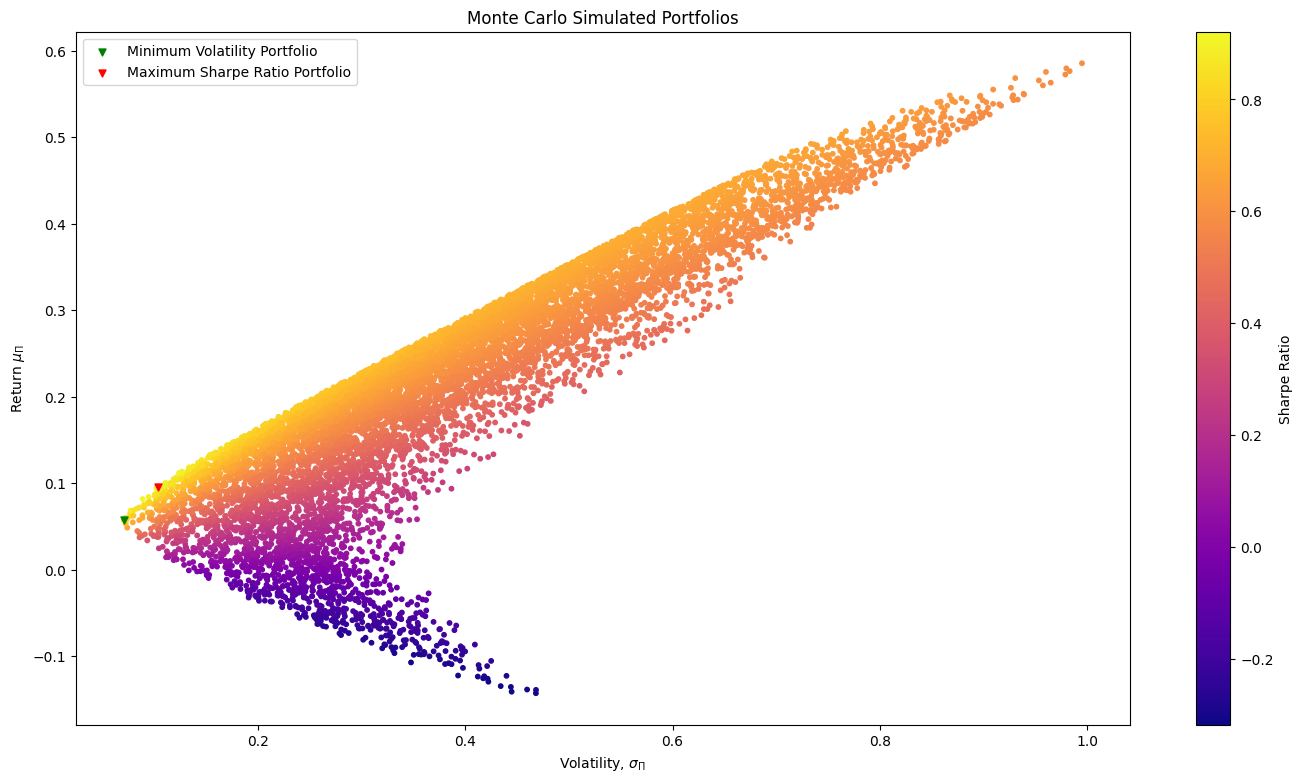

In [26]:
# Plot the Monte Carlo simulation using matplotlib 
plt.figure(figsize=(17, 9))
plt.scatter(portfolio_df['Portfolio Volatility'], portfolio_df['Portfolio Return'], s=10, c=portfolio_df['Sharpe Ratio'], cmap='plasma', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Add the Minimum Volatility portfolio
plt.scatter(min_volatility_portfolio['Portfolio Volatility'], min_volatility_portfolio['Portfolio Return'], marker='v', color='g', s=25, label='Minimum Volatility Portfolio')

# Add the Max Sharpe Ratio portfolio
plt.scatter(max_sharpe_portfolio['Portfolio Volatility'], max_sharpe_portfolio['Portfolio Return'], marker='v', color='r', s=25, label='Maximum Sharpe Ratio Portfolio')

plt.legend(loc='upper left')
plt.xlabel('Volatility, $\sigma_{\Pi}$')
plt.ylabel('Return $\mu_{\Pi}$')
plt.title('Monte Carlo Simulated Portfolios')
plt.show()

**Explanation of the plot:**

Each dot on our plot represents one of the 10,000 randomly simulated portfolios with their randomly generated asset allocation, plotted is the portfolio's return against their volatility or 'risk' where their colour is the Sharpe Ratio of the portfolio describing the returns per unit of risk of the portfolio. Together, all of the simulated portfolios represent what we can call the oppurtunity set - the set of all possible portfolios we could create by allocating different amounts or weights to assets in our investment universe. Our oppurtunity set looks like a hyperbola as we are plotting the standard deviation or volatility $\mu$ rather than the variance of each portfolio. The shape of the oppurtunity set is also determined by the correlations between the assets. The following characterists of our plot and oppurtunity set will make it hard to achieve to achieve a high return without taking on a high level of risk:
- Tilted hyperbolic shape with low eccentricty due to the low correlation of assets all being between 0 and 0.5
- The clustering of high Sharpe Ratio portfolios at the peak of the hyperbola
- The portfolio with the Maximum Sharpe Ratio is very close to the portfolio with the Minimum Volatility along the efficient frontier, giving a short efficient frontier.

**Question 5.** NASDAQ100 data provided (2017-2023) for you to implement the backtesting of 99\%/10day Value at Risk and report the following:

(a) The count and percentage of VaR breaches.

(b) The count of consecutive VaR breaches. (1, 1, 1 indicates two consecutive occurrences)

(c) Provide a plot which: identifies the breaches visually (crosses or other marks) and properly labels axis $\mathrm{X}$ with at least years.

(d) In your own words, describe the sequence of breaches caused by COVID pandemic news in 2020-Feb versus 2020-Mar.

$$
\operatorname{VaR}_{10 D, t}=\text { Factor } \times \sigma_{t} \times \sqrt{10}
$$

- Compute the rolling standard deviation $\sigma_{t}$ from 21 daily returns.
- Timescale of that $\sigma_{t}$ remains 'daily' regardless of how many returns are in the sample. To make projection, use the additivity of variance $\sigma_{10 D}=\sqrt{\sigma_{t}^{2} \times 10}$.
- A breach occurs when the forward realised 10-day return is below the $\mathrm{VaR}_{t}$ quantity.

$r_{10 D, t+10}<\operatorname{VaR}_{10 D, t} \quad$ means breach, given both numbers are negative.

VaR is fixed at time $t$ and compared to the return realised from $t$ to $t+10$, computed $\ln \left(S_{t+10} / S_{t}\right)$. Alternatively, you can compare to $\ln \left(S_{t+11} / S_{t+1}\right)$ but state this assumption in your report upfront.

**Question 6.** Re-implement backtesting using the method above, recompute $\mathrm{VaR}_{10 D, t}$ but, with the input of EWMA $\sigma_{t+1}^{2}$. Use the variance for the entire dataset to initialise the scheme.

$$
\sigma_{t+1 \mid t}^{2}=\lambda \sigma_{t \mid t-1}^{2}+(1-\lambda) r_{t}^{2}
$$

with $\lambda=0.72$ value set to minimise out of sample forecasting error.

Hint: computation of EWMA $\sigma_{t+1}^{2}$ is not sufficient, proceed to compute $\operatorname{VaR}_{10 D, t}$ and count breaches in VaR.

(a-c) Provide the same deliverables (a), (b) and (c) as in the previous Question.

(d) Briefly (3-4 lines) discuss the impact of $\lambda$ on smoothness of EWMA-predicted volatility.
